### Target 1 (Regression) -> WineQuality
### Target 2 (classification) --> WineType(Red or White)
 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import sys
import yaml
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
df=pd.read_csv("/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/data/raw/winequality.csv")
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

In [21]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'is_red'],
      dtype='object')

In [23]:
unecessary_col=['Unnamed: 0']

In [24]:
df.drop(labels=unecessary_col,axis='columns',inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


<Axes: title={'center': 'Alcohal type Distribution'}, ylabel='count'>

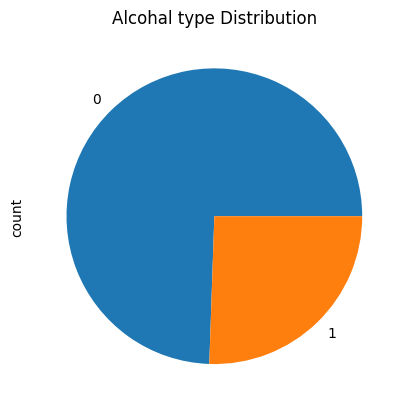

In [26]:
df['is_red'].value_counts().plot(kind='pie',title='Alcohal type Distribution')

In [20]:
print("maximum quality value=",max(df['quality']),"minimum quality value=",min(df['quality']))

maximum quality value= 9 minimum quality value= 3


In [37]:
%pwd

'/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/experiments'

In [38]:
os.chdir('../')

In [39]:
%pwd

'/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end'

In [40]:
params=yaml.safe_load(open("/Users/pratik.kujur/Desktop/Projects/Mlops-end-to-end/params.yaml"))['preprocess']


In [47]:
def DataPreprocessing(input_path,output_path):
    df=pd.read_csv(input_path)
    print("Raw Data \n",df.head())
    # add preprocessing step here

    unecessary_col=['Unnamed: 0']
    df.drop(labels=unecessary_col,axis='columns',inplace=True)
    
    os.makedirs(os.path.dirname(output_path),exist_ok=True)
    df.to_csv(output_path,index=False,header=False)
    print("Preprocessed Data \n",df.head())
    print(f"Preprocessed data is saved in this location -> {output_path}")

In [48]:
if __name__=="__main__":
    DataPreprocessing(params['input'],params['output'])

Raw Data    Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.66         0.00             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.075                 13.0                  40.0   0.9978  3.51   

   sulphates  alcohol  quality  is_red  
0       0.56      9.4        5